## Coupled Model

$$
\begin{align*}
\frac{\partial v(\mathbf{x}, t)}{\partial t} = &\; \underbrace{\mu_V \nabla^2 v}_{\text{Diffusion}} + \underbrace{\alpha \eta (C_V(t) + \frac{C_{DV}(t)}{\kappa_V(\mathbf{x})}) \frac{v(\mathbf{x}, t)}{V(t)}}_{\text{Source from } C_V \text{ and } C_{DV}} \\
&- \underbrace{\iota (C(t) + C_D(t)) v(\mathbf{x}, t)}_{\text{Sink (Infection)}}- \underbrace{\gamma_V v(\mathbf{x}, t)}_{\text{Sink (Decay)}} \\
\frac{\partial d(\mathbf{y}, t)}{\partial t} = &\; \underbrace{\mu_D \nabla^2 d}_{\text{Diffusion}} + \underbrace{\alpha \beta \eta (C_V(t) + \frac{C_{DV}(t)}{\kappa_V(\mathbf{y})}) \frac{d(\mathbf{y}, t)}{D(t)}}_{\text{Source from } C_V \text{ and } C_{DV} \text{ errors}} + \underbrace{\alpha \eta C_{DV}(t) \frac{d(\mathbf{y}, t)}{D(t)} \frac{\delta_D(\mathbf{y})}{\kappa_V(\mathbf{y})}}_{\substack{\text{Source from } C_{DV} \text{ DIP advantage}}} \\ 
&- \underbrace{\iota (C(t) + C_V(t)) d(\mathbf{y}, t)}_{\text{Sink (Infection)}} - \underbrace{\gamma_D d(\mathbf{y}, t)}_{\text{Sink (Decay)}}
\end{align*}
$$

Grid setup: nx=50, ny=50, dx=0.1200, dy=0.1200
Sparse Laplacian matrix calculated (shape: (2500, 2500), nnz: 12300).
Setting up initial conditions...
Initial V total check: 1.000e+02 (target: 1.000e+02)
Initial D total check: 1.000e+01 (target: 1.000e+01)
Initial state vector Q0 created with length 5004.
Base Model Initialized. Grid: 50x50, dx=0.120, dy=0.120
Phenotype space: [-3, 3] x [-3, 3]
Creating FFT kernel for 'interaction_scale_V' with scale=2.0000
  Kernel normalized. Integral = 1.0000
  FFT of PADDED kernel computed (100x100).
Creating FFT kernel for 'interaction_scale_D' with scale=0.5000
  Kernel normalized. Integral = 1.0000
  FFT of PADDED kernel computed (100x100).
--> Initialized 'CenterFitness_FFT' (FFT Interactions)

--- Starting Solver (LSODA) ---
Time span: (0, 50), t_eval provided: True
Tolerances: rtol=1e-05, atol=1e-08
Using finite difference Jacobian (solver default).
Solver finished in 0.40 seconds.
Success: True
Processing results...
Results processed and stor

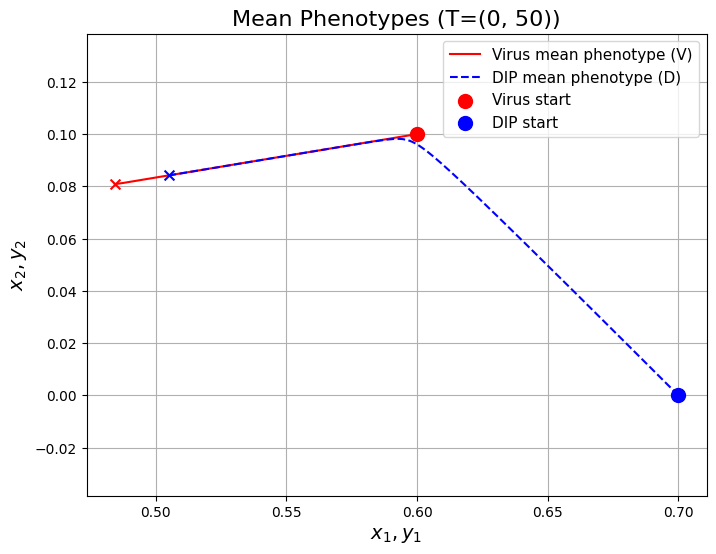


[2/4] Plotting Mean Euclidean Distance...


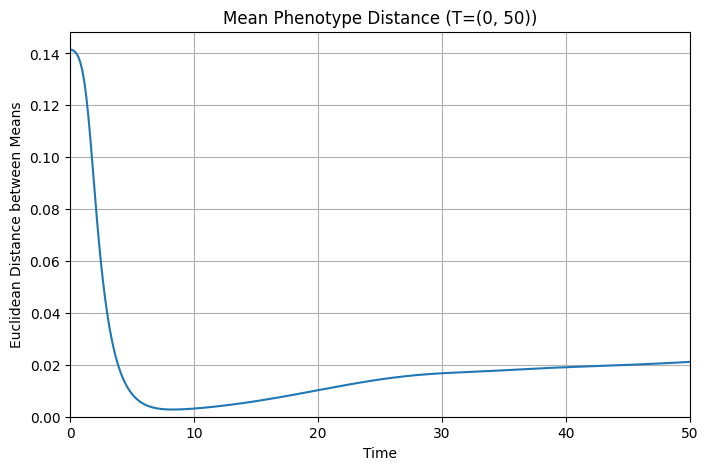


[3/4] Plotting 3 Combined Heatmaps (Scaling: Relative)...


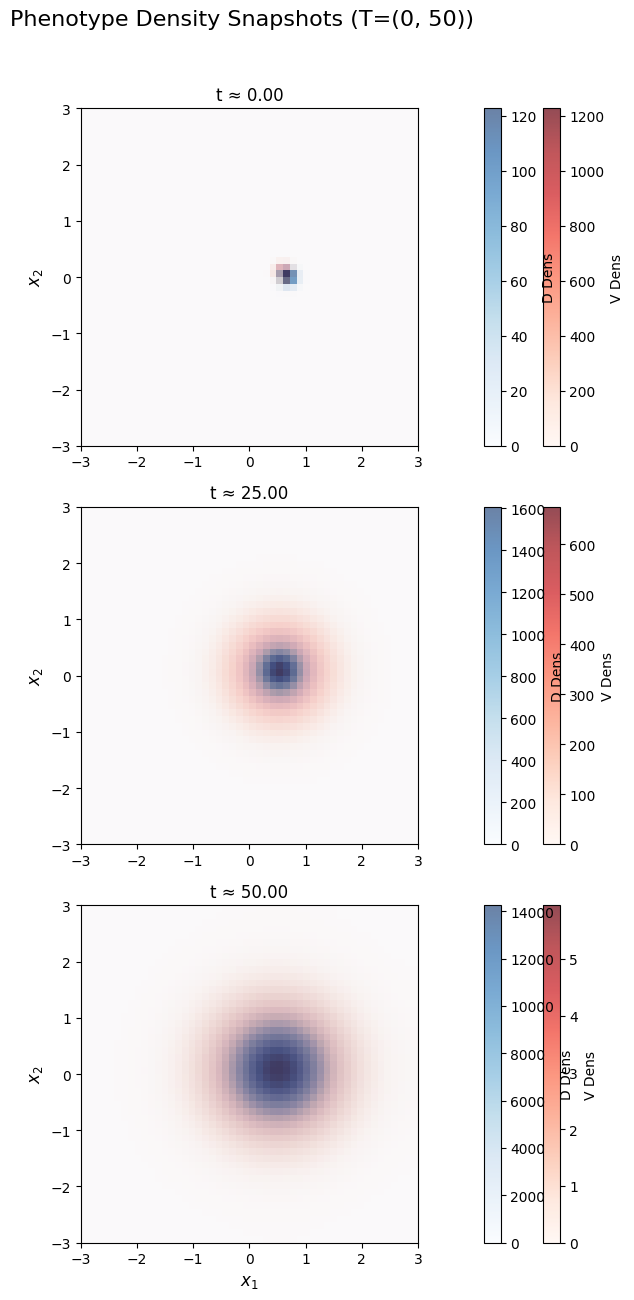


[4/4] Plotting Population Dynamics...


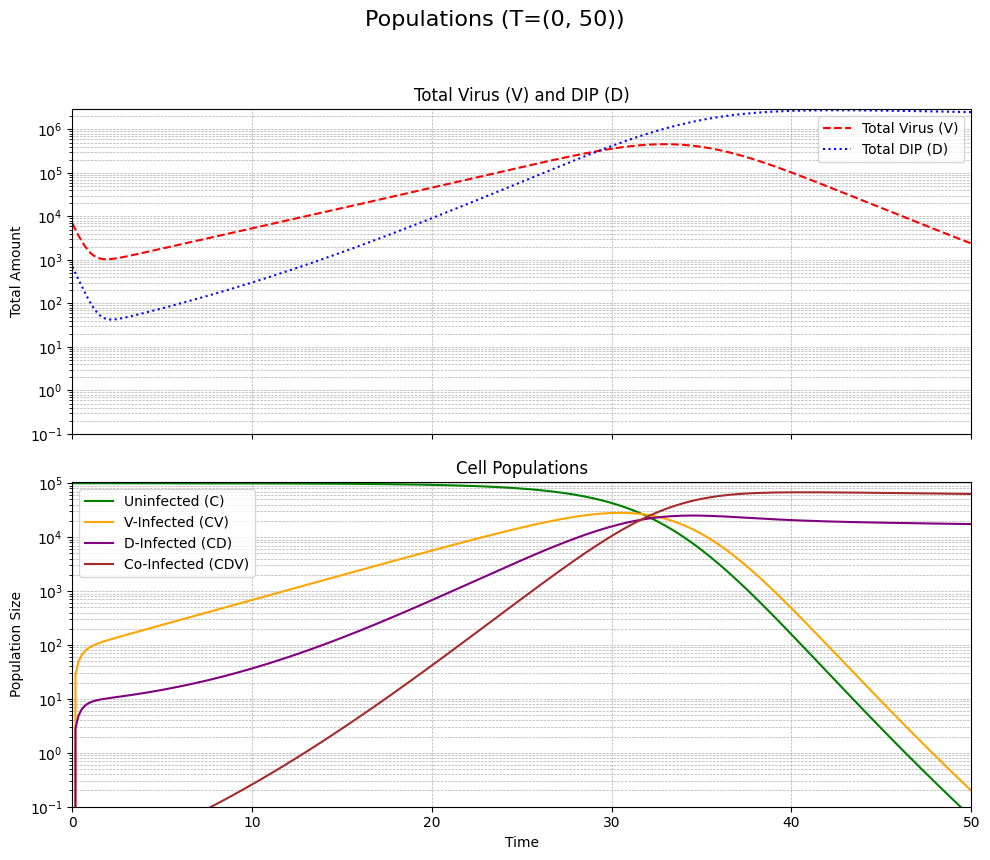


--- Quick Check Complete ---


In [ ]:
from coupled import CenterFitness, CenterFitnessFFT, quick_check
import numpy as np

nx = 50 # Grid resolution
bord = 3 # Grid border

params = {
    'eta': 25, 'beta': 0.01, 'iota': 2e-5, 'alpha': 0.01,         # Cell & Virus Dynamics
    'C0': 1e5, 'CV0': 0, 'CD0': 0, 'CDV0': 0,                   # Initial Cells
    'mu_V': 0.01, 'mu_D': 0.01, 'gamma_V': 0.02, 'gamma_D': 0.02,# Diffusion & Clearance
    'bord': bord, 'nx': nx,                                     # Phenotype Space Grid
    'delta_V_max': 10, 'delta_V_scale': 1,                   # V Interference by D
    'delta_D_max': 10, 'delta_D_scale': 1,                   # D Replication Advantage
    'V_pheno_mean_init': [0.6, 0.1], 'V_pheno_std_init': 0.1, 'V_total_init': 100, # Init V Pheno
    'D_pheno_mean_init': [0.7, 0], 'D_pheno_std_init': 0.1, 'D_total_init': 10,   # Init D Pheno
    'penalty_a': 0.1, 'penalty_b': 1, 
    # penalty_a = gaussian penalty from the origin, 
    # penalty_b =  gaussian penalty from the mean of the virus distribution
    'interaction_scale_V': 2, 'interaction_scale_D': 0.5
    # Scale of interference of DIPs on virus growth and benefit of DIP growth on viruses
}

# Define time span and evaluation points
t_final = 50
t_eval = np.linspace(0, t_final, 301) # Adjust number of points as needed

model = CenterFitnessFFT(params) # Change to CenterFitness or CenterFitnessFFT(uses fast fourier)
sol = model.solve(t_span=(0, t_final), t_eval=t_eval, method='LSODA', 
                  rtol=1e-5, atol=1e-8, use_jacobian=False) # Jacobian only for not FFT
results = model.results
t_final = t_final

quick_check(results, (0,t_final), 3, nx, bord, relative_heatmap_scaling=True)